In [10]:
# -*- coding: utf-8 -*-

# import libraries here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling 

* Use a composed dataset from kaggle, join and cleanup the data (the requirements here is to open at least 2 files, it doesn’t matter if its csv or json)
* At least 3 histograms on different aggregated data. Do an analysis on which is the optimal bin parameter (the one that maximizes clarity on specified insight). Keep an eye on the dataset you choose, it must have at least 3 numeric columns to operate.
* Plot a scatter distribution of data for a joined column with any column you like
* Create a combined scatterplot with a two series you choosed, it should contain the legend for each scatterplot
* Create a plot for a category distribution (using seaborn violin plot o other kind of graph that fits better your data using catplot) https://seaborn.pydata.org/generated/seaborn.catplot.html
* Do a comparision with 3x3 subplot matrix. Plots can be anything you liked about the dataset

# Step1: Select the database 

Seleccionas una base de dato con multiples archivos, me he asegurado de que en ella haya varias tipos numericos para poder tratar con ellas a la hora de hacer histogramas, correlaciones, etc.

La base de datos que he seleccionado trata con datos de accidentes de trafico en UK y informacion sobre los vehiculos involucrados 

- Importo la primera base de datos donde se muestran informacion acerca de los accidentes

In [11]:
df_acc = pd.read_csv('uk-accidents/Accident_Information.csv')
df_acc.head()

/usr/local/Cellar/ipython/7.0.1/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [68]:
null_cols = df_acc.isnull().sum()
null_cols[null_cols > 0]

1st_Road_Number                                     2
2nd_Road_Class                                 789860
2nd_Road_Number                                 17440
Did_Police_Officer_Attend_Scene_of_Accident       278
Latitude                                          145
Location_Easting_OSGR                             145
Location_Northing_OSGR                            145
Longitude                                         146
LSOA_of_Accident_Location                      137822
Pedestrian_Crossing-Human_Control                 346
Pedestrian_Crossing-Physical_Facilities           795
Speed_limit                                        37
Time                                              153
InScotland                                         50
dtype: int64

In [3]:
df_acc.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [4]:
df_acc.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [5]:
df_v = pd.read_csv('uk-accidents/Vehicle_Information.csv', encoding="ISO-8859-1")
df_v.head(10)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004
5,200401BS00004,36 - 45,10.0,Data missing or out of range,NaN,1781.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,U-turn,2,109,Data missing or out of range,Offside,2004
6,200401BS00009,26 - 35,NaN,Urban area,4.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Did not impact,2004
7,200401BS00010,36 - 45,NaN,Urban area,8.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
8,200401BS00012,46 - 55,3.0,Data missing or out of range,NaN,2685.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,109,Data missing or out of range,Back,2004
9,200401BS00013,26 - 35,4.0,Urban area,6.0,2300.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Offside,2004


In [69]:
null_cols = df_v.isnull().sum()
null_cols[null_cols > 0]

Age_of_Vehicle                      358149
Driver_IMD_Decile                   734812
Engine_Capacity_.CC.                265861
make                                110845
model                               325331
Propulsion_Code                     245843
Vehicle_Location.Restricted_Lane      1317
dtype: int64

In [6]:
df_v.dtypes

Accident_Index                       object
Age_Band_of_Driver                   object
Age_of_Vehicle                      float64
Driver_Home_Area_Type                object
Driver_IMD_Decile                   float64
Engine_Capacity_.CC.                float64
Hit_Object_in_Carriageway            object
Hit_Object_off_Carriageway           object
Journey_Purpose_of_Driver            object
Junction_Location                    object
make                                 object
model                                object
Propulsion_Code                      object
Sex_of_Driver                        object
Skidding_and_Overturning             object
Towing_and_Articulation              object
Vehicle_Leaving_Carriageway          object
Vehicle_Location.Restricted_Lane    float64
Vehicle_Manoeuvre                    object
Vehicle_Reference                     int64
Vehicle_Type                         object
Was_Vehicle_Left_Hand_Drive          object
X1st_Point_of_Impact            

# Step2: Data cleaning 

Utilizo unicamente las columnas que necesito de cada df 

In [70]:
accidents = df_acc[['Accident_Index','Number_of_Casualties','Number_of_Vehicles','Speed_limit','Year']]
accidents.head()


,Accident_Index,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year
0,200501BS00001,1,1,30.0,2005
1,200501BS00002,1,1,30.0,2005
2,200501BS00003,1,2,30.0,2005
3,200501BS00004,1,1,30.0,2005
4,200501BS00005,1,1,30.0,2005


In [71]:
null_cols = accidents.isnull().sum()
null_cols[null_cols > 0]

Speed_limit    37
dtype: int64

In [65]:
vehicles = df_v[['Accident_Index','Age_of_Vehicle','Engine_Capacity_.CC.']]
display(vehicles.head(10))
print(len(vehicles))

,Accident_Index,Age_of_Vehicle,Engine_Capacity_.CC.
0,200401BS00001,3.0,1588.0
1,200401BS00002,NaN,NaN
2,200401BS00003,4.0,998.0
3,200401BS00003,NaN,NaN
4,200401BS00004,1.0,124.0
5,200401BS00004,10.0,1781.0
6,200401BS00009,NaN,NaN
7,200401BS00010,NaN,NaN
8,200401BS00012,3.0,2685.0
9,200401BS00013,4.0,2300.0


2177205


In [72]:
null_cols = vehicles.isnull().sum()
null_cols[null_cols > 0]

Age_of_Vehicle          358149
Engine_Capacity_.CC.    265861
dtype: int64

In [66]:
#Drop missing because I have a lot of records

# Step 3: Histograma

Creamos diferentes histogramas con diferentes tamaños de bins, y de esta manera podemos concluir que tamaño es el idonio para interpretarlos



1
67
1.833212154339964


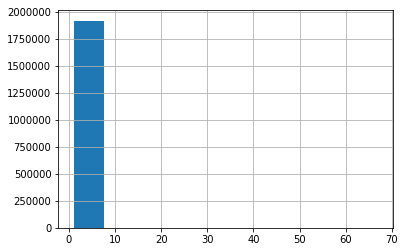

In [11]:
accidents['Number_of_Vehicles'].hist()
print(accidents['Number_of_Vehicles'].min())
print(accidents['Number_of_Vehicles'].max())
print(accidents['Number_of_Vehicles'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x1114ada90>,
 'caps': [<matplotlib.lines.Line2D at 0x1114ad828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1114ade48>],
 'medians': [<matplotlib.lines.Line2D at 0x1114b38d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1114b3da0>],
 'means': []}

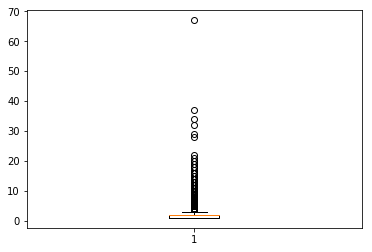

In [12]:
plt.boxplot(accidents['Number_of_Vehicles'])

En este boxplot, tras haber filtrado el numero de vehiculos involucrados en el accidente, podemos observar que la media se encuentra entre 1 y 2, con la mediana en 2.00

## Subsetting de dataframes

In [53]:
#Subset selection for accidents with less than 4 vehicles involved
filtered_accidents = accidents[(accidents['Number_of_Vehicles'] <4)]
#accidents[['Number_of_Vehicles']<=10].value_counts()
print(filtered_accidents.info())
display(filtered_accidents.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873507 entries, 0 to 1917273
Data columns (total 5 columns):
Accident_Index          object
Number_of_Casualties    int64
Number_of_Vehicles      int64
Speed_limit             float64
Year                    int64
dtypes: float64(1), int64(3), object(1)
memory usage: 85.8+ MB
None


,Accident_Index,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year
0,200501BS00001,1,1,30.0,2005
1,200501BS00002,1,1,30.0,2005
2,200501BS00003,1,2,30.0,2005
3,200501BS00004,1,1,30.0,2005
4,200501BS00005,1,1,30.0,2005


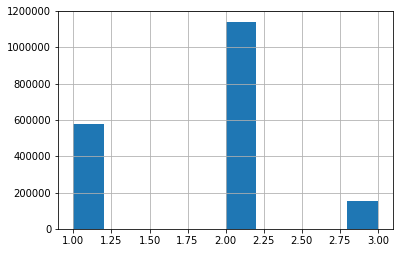

In [54]:
filtered_accidents['Number_of_Vehicles'].hist()

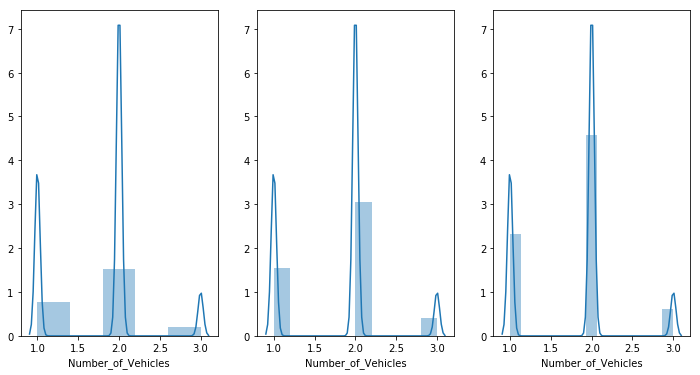

In [74]:
fig,axes= plt.subplots(1,3,figsize=(12,6))
sns.distplot(filtered_accidents['Number_of_Vehicles'], bins=5, kde=True,ax=axes[0])
sns.distplot(filtered_accidents['Number_of_Vehicles'], bins=10, kde=True,ax=axes[1])
sns.distplot(filtered_accidents['Number_of_Vehicles'], bins=15, kde=True,ax=axes[2])


Cuanto mayor sea el numero de bins mas datos habra acumulador por lo que mas informacion habra y sera mas objtiva. Aun que a veces puede resultar mas dificiles de interpetrar los datos, como ocurre en este caso donde el hecho de tener un bins=100 la cual no muestra claramente la grafica.

{'whiskers': [<matplotlib.lines.Line2D at 0x146c27860>,
 'caps': [<matplotlib.lines.Line2D at 0x146c27ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x146c27470>],
 'medians': [<matplotlib.lines.Line2D at 0x146c315c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x146c31c50>],
 'means': [<matplotlib.lines.Line2D at 0x146c31908>]}

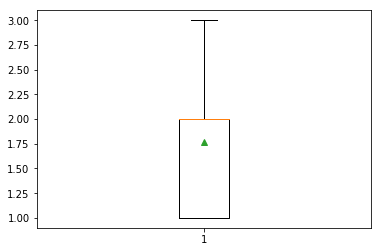

In [90]:
plt.boxplot(filtered_accidents['Number_of_Vehicles'],showmeans=True)

En este boxplot, tras haber filtrado el numero de vehiculos involucrados en el accidente, podemos observar que la media se encuentra entre 1 y 2, con la mediana en 2.00

# Step 4:  DataFrame Final

In [67]:
final_df= pd.merge(filteredDataframe,vehicles, on='Accident_Index')
final_df.head(10)

,Accident_Index,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year,Age_of_Vehicle,Engine_Capacity_.CC.
0,200501BS00002,1,1,30.0,2005,3.0,8268.0
1,200501BS00003,1,2,30.0,2005,5.0,8300.0
2,200501BS00004,1,1,30.0,2005,4.0,1769.0
3,200501BS00005,1,1,30.0,2005,10.0,85.0
4,200501BS00006,1,2,30.0,2005,1.0,2976.0
5,200501BS00006,1,2,30.0,2005,2.0,124.0
6,200501BS00007,1,2,30.0,2005,NaN,NaN
7,200501BS00007,1,2,30.0,2005,4.0,4266.0
8,200501BS00009,2,1,30.0,2005,16.0,5343.0
9,200501BS00012,1,1,30.0,2005,6.0,1988.0


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937756 entries, 0 to 1937755
Data columns (total 7 columns):
Accident_Index          object
Number_of_Casualties    int64
Number_of_Vehicles      int64
Speed_limit             float64
Year                    int64
Age_of_Vehicle          float64
Engine_Capacity_.CC.    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 118.3+ MB


In [73]:
null_cols = result.isnull().sum()
null_cols[null_cols > 0]

Speed_limit                 65
Age_of_Vehicle          318937
Engine_Capacity_.CC.    237714
dtype: int64

In [48]:
result.drop(result.index[0], inplace=True)
result.head()

,Accident_Index,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year,Age_of_Vehicle,Engine_Capacity_.CC.
1,200501BS00003,1,2,30.0,2005,5.0,8300.0
2,200501BS00004,1,1,30.0,2005,4.0,1769.0
3,200501BS00005,1,1,30.0,2005,10.0,85.0
4,200501BS00006,1,2,30.0,2005,1.0,2976.0
5,200501BS00006,1,2,30.0,2005,2.0,124.0


In [21]:
null_cols = result.isnull().sum()
null_cols[null_cols > 0]

Age_of_Vehicle          2275422
Engine_Capacity_.CC.    2183134
Number_of_Casualties    2177205
Number_of_Vehicles      2177205
Speed_limit             2177242
Year                    2177205
dtype: int64

# Step 5: scatter distribution

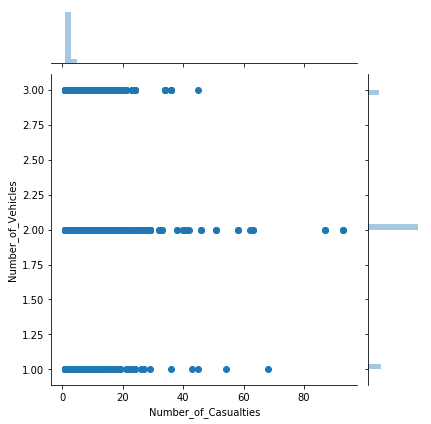

In [77]:
sns.jointplot(x="Number_of_Casualties", y="Number_of_Vehicles", data=result)

# Step 6: Combined scatterplot 

True


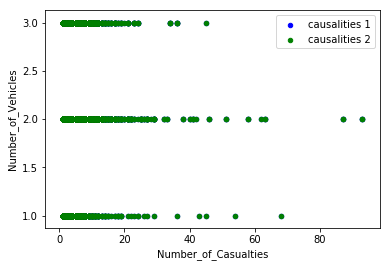

In [75]:
ax1 = result.plot(kind='scatter', x='Number_of_Casualties', y='Number_of_Vehicles', color='b',label='causalities 1')    
ax2 = result.plot(kind='scatter', x='Number_of_Casualties', y='Number_of_Vehicles', color='g', label= 'causalities 2',ax=ax1)    

print(ax1 == ax2)

In [87]:
n_casualties = result[(result['Number_of_Casualties'] <5)]

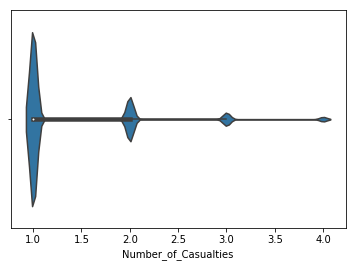

In [88]:
sns.violinplot("Number_of_Casualties", data=n_casualties)

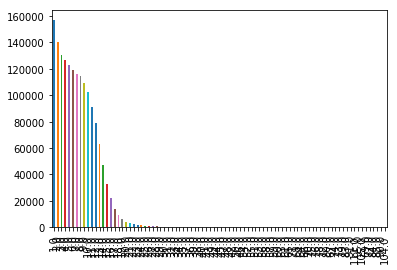

In [78]:
result['Age_of_Vehicle'].value_counts().plot.bar()

numero de victimas / edad del vehiculo 

In [85]:
age_v = result[(result['Age_of_Vehicle'] <30)]

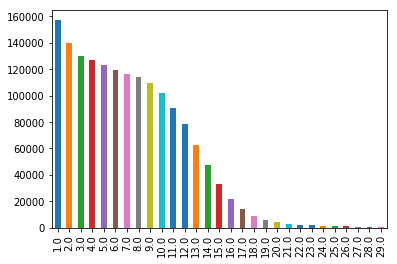

In [86]:
age_v['Age_of_Vehicle'].value_counts().plot.bar()